# Model selection: choosing estimators and their parameters

https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html

In [1]:
from sklearn import datasets, svm
X_digits, y_digits = datasets.load_digits(return_X_y=True)
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.98

In [2]:
import numpy as np
X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = []
for k in range(3):
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
print(scores)

[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]


In [3]:
from sklearn.model_selection import KFold, cross_val_score
X = [*["a" for i in range(3)], *["b" for i in range(2)], *["c" for i in range(5)]]
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(X):
    print(f"Train: {train_indices} | test: {test_indices}")

Train: [2 3 4 5 6 7 8 9] | test: [0 1]
Train: [0 1 4 5 6 7 8 9] | test: [2 3]
Train: [0 1 2 3 6 7 8 9] | test: [4 5]
Train: [0 1 2 3 4 5 8 9] | test: [6 7]
Train: [0 1 2 3 4 5 6 7] | test: [8 9]


In [4]:
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test])
    for train, test in k_fold.split(X_digits)]

[0.9638888888888889,
 0.9222222222222223,
 0.9637883008356546,
 0.9637883008356546,
 0.9303621169916435]

In [5]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=-1)

array([0.96388889, 0.92222222, 0.9637883 , 0.9637883 , 0.93036212])

Exercise

On the digits dataset, plot the cross-validation score of a SVC estimator with an linear kernel as a function of parameter C (use a logarithmic grid of points, from 1 to 10).

In [19]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

X, y = datasets.load_digits(return_X_y=True)

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = []
svc = svm.SVC(C=0.1, kernel='linear')
k_fold = KFold(n_splits=5)
cross_val_score(svc, X, y, cv=k_fold, n_jobs=-1)

array([0.96388889, 0.92222222, 0.9637883 , 0.9637883 , 0.93036212])

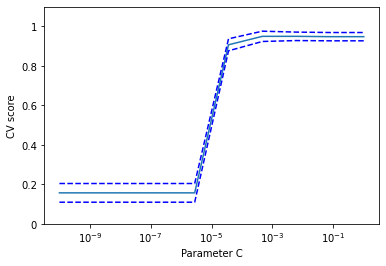

In [20]:
scores_std = []
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

import matplotlib.pyplot as plt
plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

In [27]:
np.mean(cross_val_score(svm.SVC(C=0.0000001, kernel='linear'), X, y, n_jobs=1))

0.15754874651810585

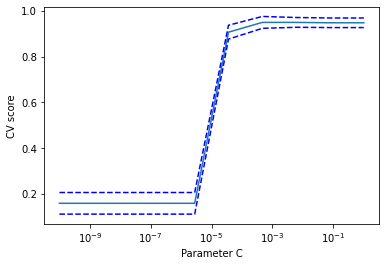

In [51]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm
import matplotlib.pyplot as plt
X, y = datasets.load_digits(return_X_y=True)
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)
scores = []
scores_std = []
for C in C_s:
    svc.C = C
    the_scores = cross_val_score(svc, X, y)
    scores.append(np.mean(the_scores))
    scores_std.append(np.std(the_scores))
plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
plt.ylabel("CV score")
plt.xlabel("Parameter C")
plt.show();

In [52]:
from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),
                  n_jobs=-1)
clf.fit(X_digits[:1000], y_digits[:1000])

GridSearchCV(estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])})

In [53]:
clf.best_score_

0.95

In [54]:
clf.best_estimator_.C

0.0021544346900318843

In [55]:
clf.score(X_digits[1000:], y_digits[1000:])

0.946047678795483

In [56]:
cross_val_score(clf, X_digits, y_digits)

array([0.94722222, 0.91666667, 0.96657382, 0.97493036, 0.93593315])

In [57]:
from sklearn import linear_model, datasets
lasso = linear_model.LassoCV()
X_diabetes, y_diabetes = datasets.load_diabetes(return_X_y=True)
lasso.fit(X_diabetes, y_diabetes)
lasso.alpha_

0.003753767152692203

Optimal parameter alpha: 0.4329899202589983


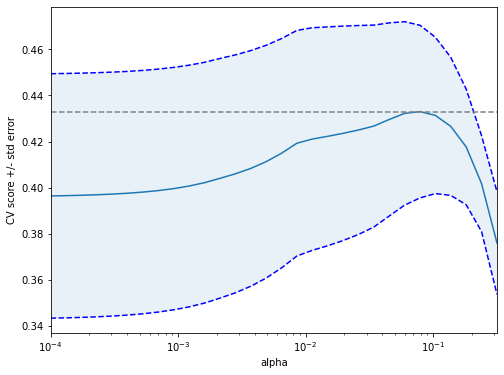

In [83]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
X, y = datasets.load_diabetes(return_X_y=True)
X = X[:150]
y = y[:150]
lasso = Lasso(random_state=0, max_iter=int(1e4))
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = dict(alpha=alphas)
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
print(f"Optimal parameter alpha: {np.max(scores)}")
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
std_error = scores_std / np.sqrt(n_folds)
plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.1)
plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show();